In [1]:
import pandas as pd
from pathlib import Path
# import matplotlib_venn
import scanpy as sc
import stlearn as st
import anndata as ad
import seaborn as sns
import pickle
from matplotlib import pyplot as plt

In [2]:
# Wiener
BASE_PATH = Path("/scratch/imb/Xiao/")

In [ ]:
# Bunya
BASE_PATH = Path("/scratch/project_mnt/S0010/Xiao")

In [3]:
OUT_PATH = BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_LOOCV_kidney_selected_gene" / "PLOT"
OUT_PATH.mkdir(parents=True, exist_ok=True)

In [4]:
df = pd.DataFrame()
for file in (BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_LOOCV_kidney_selected_gene").rglob("stimage*.csv"):
    df = pd.concat([df, pd.read_csv(file, index_col=0)], axis=0)

In [5]:
df

,Gene,Pearson correlation,Slide,Method
0,ISG15,0.055433,VLP12_D,STimage
1,TNFRSF18,0.000033,VLP12_D,STimage
2,TNFRSF4,0.131087,VLP12_D,STimage
3,CALML6,0.000401,VLP12_D,STimage
4,HES5,-0.014225,VLP12_D,STimage
...,...,...,...,...
1625,FLNA,0.110761,VLP12_A,STimage
1626,DNASE1L1,0.009171,VLP12_A,STimage
1627,G6PD,0.053168,VLP12_A,STimage
1628,IKBKG,0.029432,VLP12_A,STimage


<AxesSubplot:xlabel='Slide', ylabel='Pearson correlation'>

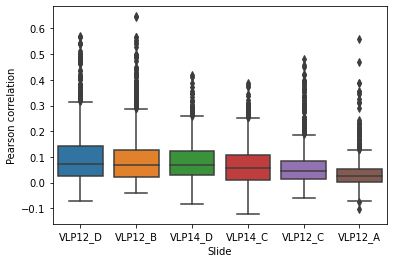

In [6]:
sns.boxplot(x="Slide", y="Pearson correlation", data=df)

In [7]:
top_300gene = df.groupby("Gene")["Pearson correlation"].mean().sort_values(ascending=False)[0:300].index
for i in top_300gene:
    print(i)

CD24
VEGFA
CD74
MIF
RHOB
PFN1
IGFBP3
CTSB
ANXA4
B2M
CD63
SPP1
HLA-DPA1
HSPB1
TAPBP
A2M
HLA-DPB1
HLA-E
S100A10
IL32
GNAS
HLA-DRA
CD81
HLA-DQB1
LRP2
HLA-F
TXNIP
CLU
DDIT4
NFKBIA
CXCL14
CCND1
MYH9
DUSP1
NUPR1
COL1A2
CEBPD
GTF2I
ID2
SDHA
HSP90B1
ITGB1
ZFP36L2
HLA-DQA1
TAP1
VCAM1
BNIP3
EIF4A2
RHOA
APP
SERPING1
FLNA
EPAS1
CD164
PDIA6
RAC1
CD46
MGST1
MAF
HMGB1
LGALS3
CTNNA1
STOM
PSMB8
PSMB9
CTSH
CD99
SERPINA1
MET
GPI
HLA-DMA
CTSD
MCL1
CXCR4
ACTN4
APOE
SF3B1
ENG
ANXA5
C1QA
PECAM1
TNFRSF14
INSR
TIMP1
TNFSF10
ERBB3
JUN
ANXA2
TNFRSF1A
CTSL
RPN2
STAT1
DDX3X
C1QB
SRSF2
MSN
EFNA1
RBX1
ILF3
NRP1
C3
HLA-DMB
IRF1
ADGRE5
SYPL1
COL1A1
BIRC3
PTEN
VEGFB
ITGB2
RGS1
LAMP2
COL3A1
GNAI2
CX3CL1
LAMP1
IFNGR1
LRP1
PSMB10
MCAM
POLD4
IFITM2
CDKN1A
VPS28
CTNND1
SERPINE1
NLRC5
IDH2
IL6ST
PAX8
ID3
MACF1
PDGFRB
CD9
LCP1
ITGA1
ARHGEF7
DOCK8
NOTCH3
HUWE1
SIRPA
EGFR
LRRK2
CD34
BCL2
ETS1
PSMB7
IGF2R
EDNRB
AXL
CTNNB1
ATM
PSMD2
MGAT1
LIPA
THBS1
CFB
IQGAP1
CD52
DPP4
GNG12
MAPK1
CD47
BST2
CCND2
GZMK
SDHD
TAP2
ERRFI1
DDX41
THY1

In [8]:
top_100gene = df.groupby("Gene")["Pearson correlation"].mean().sort_values(ascending=False)[0:100].index
df_top100 = df[df["Gene"].isin(top_100gene)]

In [11]:
# # save pickle
with open(BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_LOOCV_kidney_selected_gene"/ "top100gene.pkl", "wb") as f:
    pickle.dump(top_100gene, f)

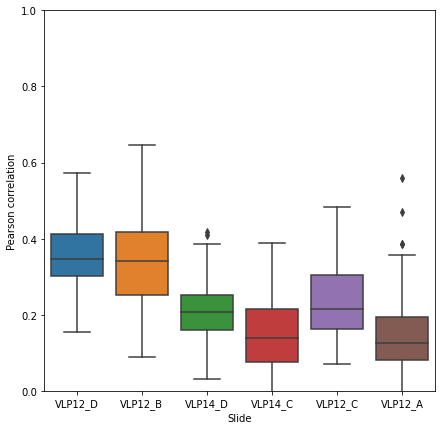

In [10]:
ax, fig = plt.subplots(figsize=(7,7))
sns.boxplot(x="Slide", y="Pearson correlation", data=df_top100)
plt.ylim(0,1)
plt.savefig(OUT_PATH / "top_100gene.pdf")